In [1]:
%load_ext autoreload
%autoreload 2

from rBergomi import roughBergomi
import matplotlib.pyplot as plt
import numpy as np

In [11]:
model = roughBergomi()
volterra, W, dW = model.simulate_paths()
V = model.simulate_V(volterra)
model.price_delta(V,dW, spot=1.3)

(DeviceArray(0.3050046, dtype=float32),
 DeviceArray(0.929719, dtype=float32, weak_type=True))

In [3]:
#spots, payoffs, deltas = model.payoff_delta(V=V, dW=dW)

  0%|          | 0/65536 [00:00<?, ?it/s]

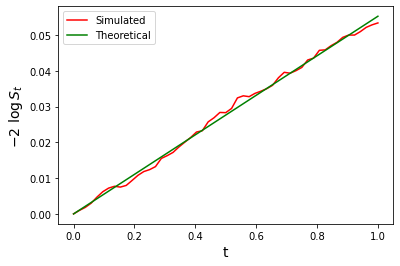

In [ ]:
#t = np.linspace(0, model.T, model.s + 1)
#plot, ax = plt.subplots()
#ax.plot(t/model.T, -2*np.mean(np.log(S), axis=0), 'r', label='Simulated')
#ax.plot(t/model.T, model.xi * t - 2* np.log(model.spot), 'g', label='Theoretical')
#ax.set_ylabel(r'$-2\ \log S_t$', fontsize=14)
#ax.set_xlabel('t', fontsize=14)
#ax.legend()